## Demodulator

In [1]:
import functions as fn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Sim_period = 10000
Sim_fs   = 100

Sim_dt = 1/Sim_fs
Sim_t = np.arange(0,Sim_period,Sim_dt)

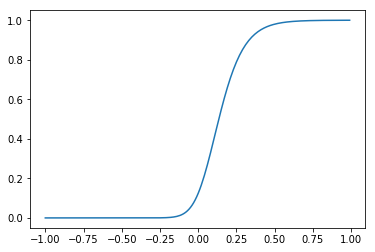

In [3]:
V_half = 0
k = 1
Vm = np.arange(-1,1,0.01)
Boltzman_nl = k / (1 + np.exp(10*(V_half - Vm)))

plt.plot(Vm, Boltzman_nl ** 3)
plt.show()

In [30]:
g_leak = 1
g_Na = .1
C = 300
V_leak = 0
V_Na = 0

In [31]:
Vm = np.zeros(Sim_t.shape)

In [32]:
V_half = 0
k = 1
Boltzman_nl = np.zeros(Vm.shape)

Boltzmann Function

### Pulse Stimulation

In [33]:
I_stim = 1

# I = I_stim * np.ones(Sim_t.shape)  # pA


I1 = fn.gen_pulse(init_time=1000,
                 on_width=100, # width of "ON" state
                 off_width=100, # width of "OFF" state
                 time_points=Sim_t)

I2 = fn.gen_pulse(init_time=1000,
                 on_width=1000, # width of "ON" state
                 off_width=1000, # width of "OFF" state
                 time_points=Sim_t)

I = I1 * I2

In [34]:
for i in range(I.shape[0]-1):
    
    # Boltzmann non-linearity
    Boltzman_nl[i] = k / (1 + np.exp(V_half - Vm[i]))
    Boltzman_nl[i] = 1
    
    # current through the leak branch
    I_leak = g_leak*(Vm[i]-V_leak)
#     I_leak = 0
    
    # current through the membrane capacitance
    I_Na = (Boltzman_nl[i]**3)*g_Na*(Vm[i]-V_Na)
    
    dVmdt = (I[i] - I_leak - I_Na) / C
    Vm[i+1] = Vm[i] + dVmdt * Sim_dt

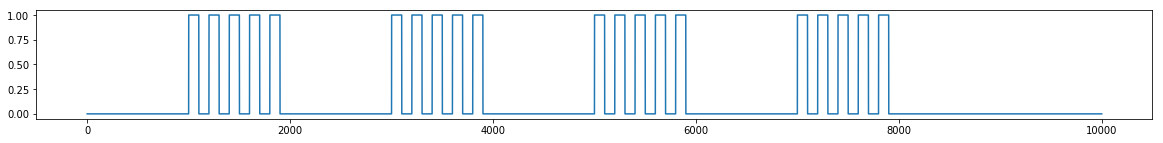

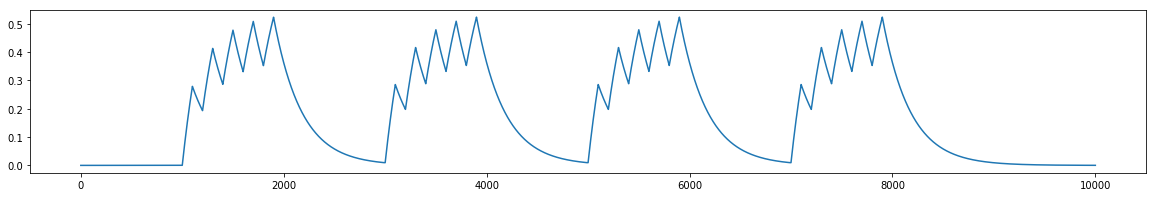

In [35]:
plt.figure(figsize=(20,2))
plt.plot(Sim_t, I)
plt.show()

plt.figure(figsize=(20,3))
plt.plot(Sim_t, Vm)
plt.show()

### Modulated Stimulation

In [ ]:
I_stim = 1

# I = I_stim * np.ones(Sim_t.shape)  # pA

I1 = fn.gen_sin(init_time=0,
                freq=1.0,
                phase=-0,
                time_points=Sim_t)
I2 = fn.gen_sin(init_time=0,
                freq=1.001,
                phase=-0,
                time_points=Sim_t)

I = I1 + I2
# I = np.maximum(I, 0)

In [ ]:
for i in range(I.shape[0]-1):
    
    # Boltzmann non-linearity
    Boltzman_nl[i] = k / (1 + np.exp(V_half - Vm[i]))
#     Boltzman_nl[i] = 1
    
    # current through the leak branch
    I_leak = g_leak*(Vm[i]-V_leak)
    I_leak = 0
    
    # current through the membrane capacitance
    I_Na = (Boltzman_nl[i]**3)*g_Na*(Vm[i]-V_Na)
    
    dVmdt = (I[i] - I_leak - I_Na) / C
    Vm[i+1] = Vm[i] + dVmdt * Sim_dt

In [ ]:
plt.figure(figsize=(20,2))
plt.plot(Sim_t, I)
plt.show()

plt.figure(figsize=(20,3))
plt.plot(Sim_t, Vm)
plt.show()

## My questions

1. How is this non-linearity effecting the subthreshold potential?

The non-linearity is a function of membrane potential. In this case, as the membrane potential increases, the conductane of the Na channel is also increasing, which basically means it makes the changes in membrane potential smaller as it gets closer to the firing threshold.

## Parameters to adjust

- circuit components' values
- the `V_half` and the function for the Boltzman function